In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv (r'D:\cars.csv')
df = df.drop('Unnamed: 0', 1)
df = df.drop('car_id', 1)

In [3]:
df.head(5)

,brand,modle,price,kilometers,stick,engine,year,hand,last_owner,curr_owner,city,brand_avg_price,brand_category
0,0,0,40000,220000.0,0,1984,2005,4.0,1,1,0,100055.787234,2
1,0,0,20900,131000.0,1,1984,2006,2.0,1,1,0,100055.787234,2
2,0,0,38000,195000.0,1,1984,2006,4.0,1,1,1,100055.787234,2
3,0,0,5000,218073.0,1,1781,2006,3.0,1,1,2,100055.787234,2
4,0,0,17000,200000.0,1,2393,2006,3.0,1,1,3,100055.787234,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7807 entries, 0 to 7806
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            7807 non-null   int64  
 1   modle            7807 non-null   int64  
 2   price            7807 non-null   int64  
 3   kilometers       7807 non-null   float64
 4   stick            7807 non-null   int64  
 5   engine           7807 non-null   int64  
 6   year             7807 non-null   int64  
 7   hand             7807 non-null   float64
 8   last_owner       7807 non-null   int64  
 9   curr_owner       7807 non-null   int64  
 10  city             7807 non-null   int64  
 11  brand_avg_price  7807 non-null   float64
 12  brand_category   7807 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 793.0 KB


In [5]:
df.describe()

,brand,modle,price,kilometers,stick,engine,year,hand,last_owner,curr_owner,city,brand_avg_price,brand_category
count,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000
mean,15.645703,15.645703,43612.755348,140477.660305,0.898168,1602.869348,2012.029845,2.266940,1.057769,0.993467,12.500576,43612.755348,1.070834
std,7.609025,7.609025,47389.352116,69379.618162,0.302446,438.280935,4.331925,0.881798,0.586043,0.080565,9.168560,30420.888312,0.290297
min,0.000000,0.000000,1400.000000,1000.000000,0.000000,875.000000,2001.000000,1.000000,0.000000,0.000000,0.000000,11526.388889,0.000000
25%,9.000000,9.000000,15000.000000,90000.000000,1.000000,1341.000000,2009.000000,2.000000,1.000000,1.000000,4.000000,31661.800995,1.000000
50%,17.000000,17.000000,29000.000000,139000.000000,1.000000,1591.000000,2012.000000,2.000000,1.000000,1.000000,11.000000,35280.264297,1.000000
75%,22.000000,22.000000,55000.000000,186000.000000,1.000000,1798.000000,2015.000000,3.000000,1.000000,1.000000,20.000000,41470.642767,1.000000
max,28.000000,28.000000,429999.000000,395000.000000,1.000000,5462.000000,2020.000000,4.000000,2.000000,1.000000,36.000000,162991.944724,2.000000


# Pie charts (percentage)

Text(0.5, 0.98, '      last owner and Current owenr pie chart')

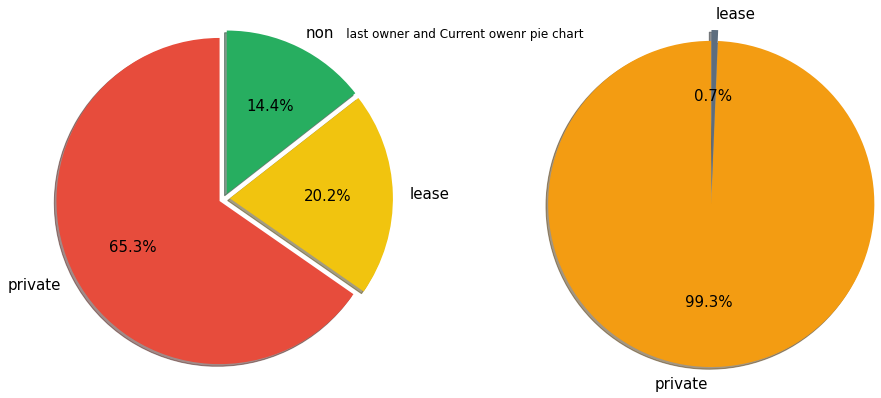

In [6]:
last_owner_series = df['last_owner'].value_counts()
last_owner_values = last_owner_series.values.tolist()
last_owner_index = ['private', 'lease', 'non']
last_owner_colors = ['#E74C3C', '#F1C40F', '#27AE60']

curr_owner_series = df['curr_owner'].value_counts()
curr_owner_values = curr_owner_series.values.tolist()
curr_owner_index = ['private', 'lease']
curr_owner_colors = ['#F39C12', '#5D6D7E']

fig, axs = plt.subplots(1,2, figsize=(16,5))

axs[0].pie(last_owner_values, labels=last_owner_index, autopct='%1.1f%%', shadow=True, startangle=90,
           explode=(0.05, 0.05, 0.05), radius=1.5, colors=last_owner_colors, textprops={'fontsize':15})
axs[1].pie(curr_owner_values, labels=curr_owner_index, autopct='%1.1f%%', shadow=True,
           startangle=90, explode=(0.05, 0.05), radius=1.5, colors=curr_owner_colors, textprops={'fontsize':15})

fig.suptitle('      last owner and Current owenr pie chart')

In [7]:
df['price'].corr(df['last_owner'])

0.24214466690621475

In [8]:
df['price'].corr(df['curr_owner'])

-0.028012425597886546

###  99% of the current owners are private
### almost 80% of previuse owners are not leased
we can see that both of those factors wont change the price alot overall

Text(0.5, 0.98, 'stick and number of hands pie charts')

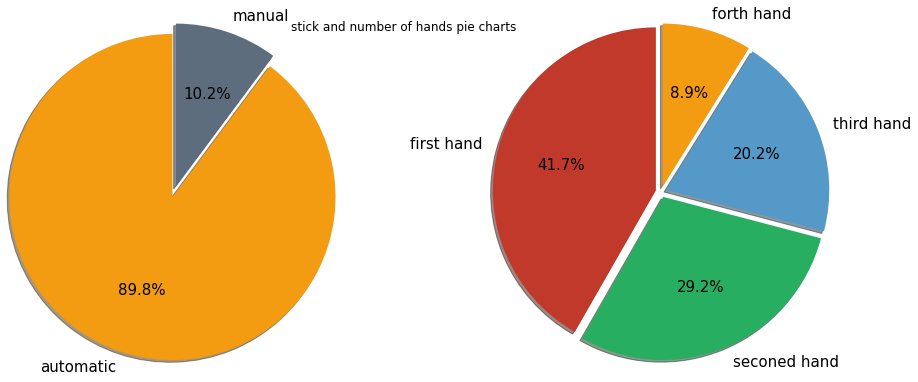

In [9]:
stick_series = df['stick'].value_counts()
stick_values = stick_series.values.tolist()
stick_index = ['automatic', 'manual']
stick_colors = ['#F39C12', '#5D6D7E']

hand_series = df['hand'].value_counts()
hand_values = hand_series.values.tolist()
hand_index = ['first hand', 'seconed hand', 'third hand', 'forth hand']
hand_colors = ['#C0392B', '#27AE60', '#5499C7', '#F39C12', '#707B7C']


fig, axs = plt.subplots(1,2, figsize=(16,5))

axs[0].pie(stick_values, labels=stick_index, autopct='%1.1f%%', shadow=True, startangle=90,
           explode=(0.05, 0.05), radius=1.5, colors=stick_colors, textprops={'fontsize':15})
axs[1].pie(hand_values, labels=hand_index, autopct='%1.1f%%', shadow=True,
           startangle=90, explode=(0.05, 0.05, 0.05, 0.05), radius=1.5, colors=hand_colors, textprops={'fontsize':15})

fig.suptitle('stick and number of hands pie charts')

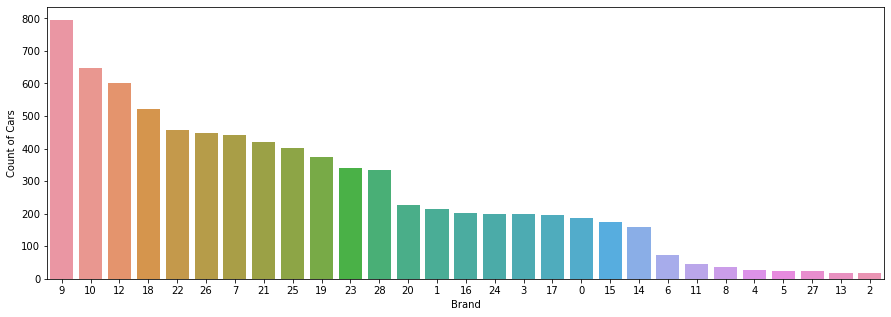

<Figure size 432x288 with 0 Axes>

In [10]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

# outliers check

# LINE PLOTS

In [11]:
df.corr()

,brand,modle,price,kilometers,stick,engine,year,hand,last_owner,curr_owner,city,brand_avg_price,brand_category
brand,1.000000,1.000000,-0.197686,-0.063574,-0.150448,-0.229182,0.086372,-0.041960,-0.014658,-0.018195,0.029306,-0.307953,-0.308661
modle,1.000000,1.000000,-0.197686,-0.063574,-0.150448,-0.229182,0.086372,-0.041960,-0.014658,-0.018195,0.029306,-0.307953,-0.308661
price,-0.197686,-0.197686,1.000000,-0.512763,0.124886,0.336956,0.600385,-0.300906,0.242145,-0.028012,-0.011468,0.641935,0.572906
kilometers,-0.063574,-0.063574,-0.512763,1.000000,0.012831,0.140780,-0.684235,0.372686,-0.259455,0.028073,0.011986,-0.162234,-0.149416
stick,-0.150448,-0.150448,0.124886,0.012831,1.000000,0.236894,-0.031805,-0.022952,-0.075220,-0.027304,0.002400,0.063579,0.070493
engine,-0.229182,-0.229182,0.336956,0.140780,0.236894,1.000000,-0.138357,0.083830,-0.008715,0.000473,0.002752,0.340946,0.369195
year,0.086372,0.086372,0.600385,-0.684235,-0.031805,-0.138357,1.000000,-0.450338,0.186382,-0.072854,-0.012478,0.198456,0.172721
hand,-0.041960,-0.041960,-0.300906,0.372686,-0.022952,0.083830,-0.450338,1.000000,-0.505312,0.069630,-0.003220,-0.031720,-0.022329
last_owner,-0.014658,-0.014658,0.242145,-0.259455,-0.075220,-0.008715,0.186382,-0.505312,1.000000,-0.040845,-0.007147,0.104207,0.082871
curr_owner,-0.018195,-0.018195,-0.028012,0.028073,-0.027304,0.000473,-0.072854,0.069630,-0.040845,1.000000,0.012232,0.017087,0.019788


### from the table we can see that the featurs with the most positive correlation to price are:
### year,engine and brand category 
### and we will show the correlation of the Numeric Variables here

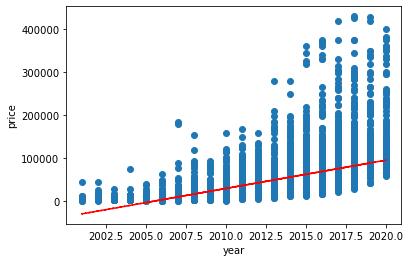

In [12]:
x = df['year']
y = df['price']
plt.xlabel('year')
plt.ylabel('price')
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

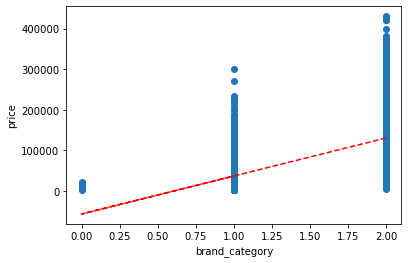

In [13]:
x = df['brand_category']
y = df['price']
plt.xlabel('brand_category')
plt.ylabel('price')
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

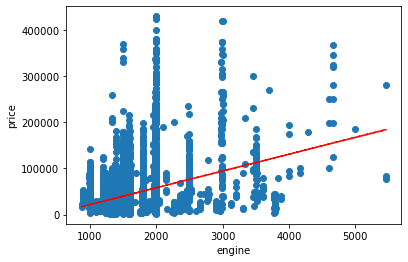

In [14]:
x = df['engine']
y = df['price']
plt.xlabel('engine')
plt.ylabel('price')
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

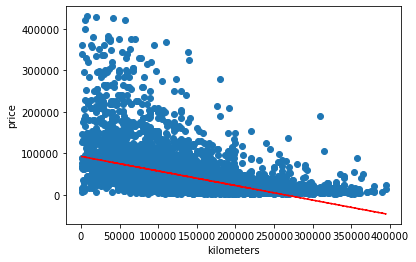

In [15]:
x = df['kilometers']
y = df['price']
plt.xlabel('kilometers')
plt.ylabel('price')
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

### we can see the corolationg is negative

# summary

### we will show the correlation of the Categorical Variables here

<AxesSubplot:xlabel='city', ylabel='price'>

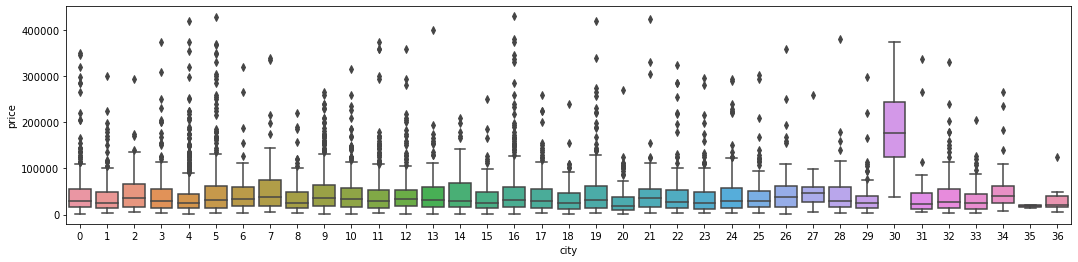

In [16]:
outliers_length = plt.figure(figsize=(18, 4))
sns.boxplot(df.city,df.price)

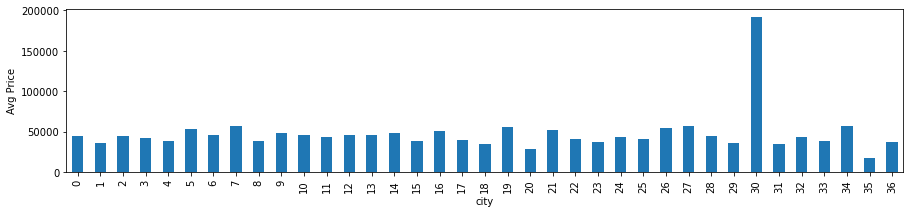

In [17]:
df_comp_avg_price = df[['city','price']].groupby("city", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'city', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("city")
plt1.set_ylabel("Avg Price")
plt.show()

In [18]:
df['city'].corr(df['last_owner'])

-0.007146841961652373

<AxesSubplot:xlabel='brand', ylabel='price'>

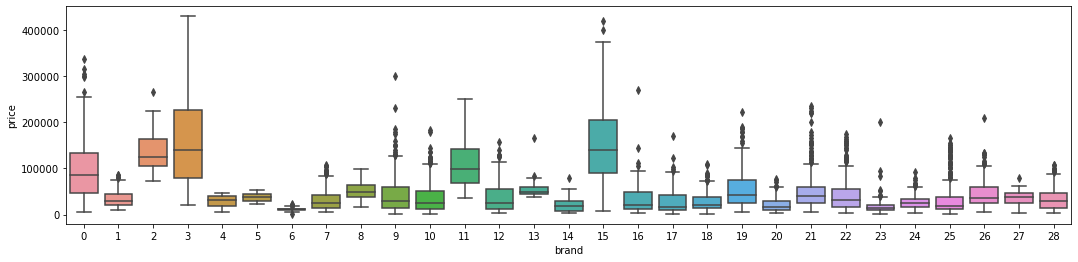

In [19]:
outliers_length = plt.figure(figsize=(18, 4))
sns.boxplot(df.brand,df.price)

In [20]:
df['brand'].corr(df['last_owner'])

-0.01465761164377894

### there is no strong corolation between price and brand/city

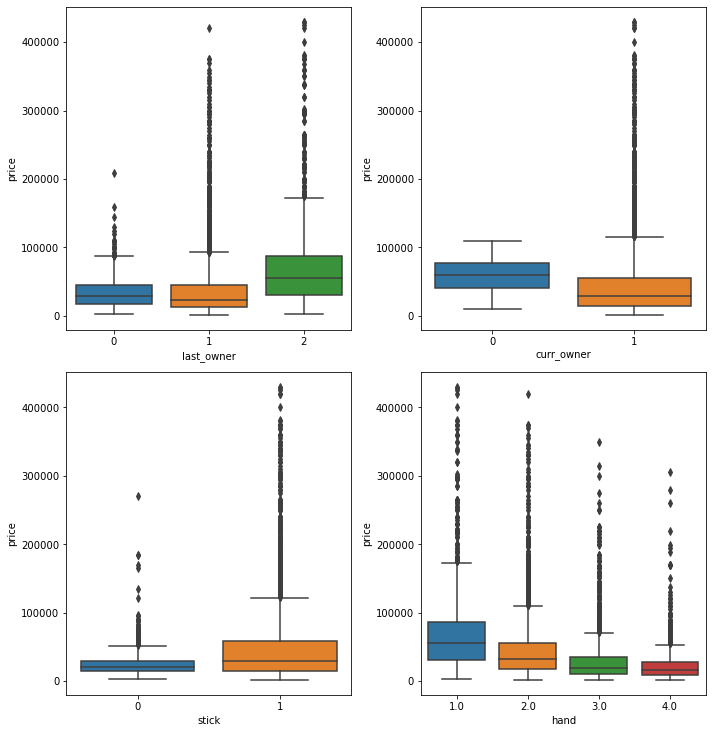

In [21]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'last_owner', y = 'price', data = df)
plt.xticks([0, 1, 2], ['private', 'lease', 'non'])
plt.subplot(4,2,2)
sns.boxplot(x = 'curr_owner', y = 'price', data = df)
plt.xticks([0, 1], ['private', 'lease'])
plt.subplot(4,2,3)
sns.boxplot(x = 'stick', y = 'price', data = df)
plt.xticks([0, 1], ['manual', 'auto'])
plt.subplot(4,2,4)
sns.boxplot(x = 'hand', y = 'price', data = df)
plt.xticks([0, 1,2,3], ['1', '2','3','4'])
plt.tight_layout()
plt.show()

In [22]:
df.to_csv(r'D:\cars.csv')